In [5]:
! pip install imgaug

In [1]:
! pip install opencv-python
import cv2

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage



ia.seed(1)

image = ia.quokka(size=(256, 256))
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=65, y1=100, x2=200, y2=150),
    BoundingBox(x1=150, y1=80, x2=200, y2=130)
], shape=image.shape)

seq = iaa.Sequential(
    iaa.Fliplr(1)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs


# Augment BBs and images.
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, size=2)
image_after = bbs_aug.draw_on_image(image_aug, size=2, color=[0, 0, 255])

BB 0: (65.0000, 100.0000, 200.0000, 150.0000) -> (56.0000, 100.0000, 191.0000, 150.0000)
BB 1: (150.0000, 80.0000, 200.0000, 130.0000) -> (56.0000, 80.0000, 106.0000, 130.0000)


In [23]:
flip = iaa.Sequential([iaa.Fliplr(1)])

In [4]:
image_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\images"

In [19]:
img.shape

(480, 640, 3)

In [22]:
np.asarray(img).shape

(480, 640, 3)

In [27]:
bbs = BoundingBoxesOnImage(BoundingBox(x1=0, y1=0, x2=100, y2=100), shape=img.shape)

In [35]:
np.expand_dims(np.array(img), axis=0).shape

(1, 480, 640, 3)

In [38]:
img = cv2.imread(os.path.join(image_dir, 'P016_balloon1_4098.jpg'))

img_aug, bbs_aug = flip(image=np.array(img), bounding_boxes=bbs)


AttributeError: 'numpy.ndarray' object has no attribute 'deepcopy'

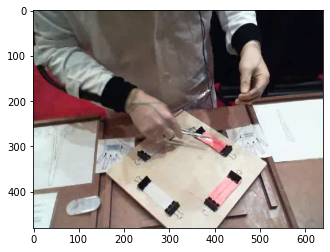

In [5]:
img = cv2.imread(os.path.join(image_dir, 'P016_balloon1_4098.jpg'))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)		# this converts it into RGB

plt.imshow(rgb_img)
plt.show()

In [6]:
bbox_label_df[bbox_label_df["file_name"].astype(str).str.contains('P017_balloon1_3806')]

,label,x,y,w,h,file_name,label_names
0,0,0.380914,0.569837,0.326264,0.153261,P017_balloon1_3806.txt,Right_Scissors
1,1,0.527732,0.414538,0.251223,0.407337,P017_balloon1_3806.txt,Left_Scissors


In [8]:
bb_list = bbox_label_df[bbox_label_df["file_name"].astype(str).str.contains('P017_balloon1_3806')].iloc[0, 1:5].tolist()

In [9]:
! pip install bbox-visualizer

In [10]:
import bbox_visualizer as bbv

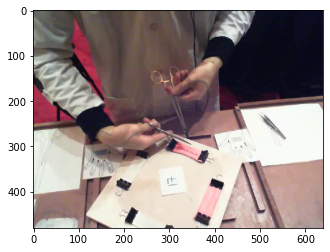

In [11]:
img = cv2.imread(os.path.join(image_dir, 'P017_balloon1_3806.jpg'))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)		# this converts it into RGB

plt.imshow(rgb_img)
plt.show()

In [85]:
# reading files into pandas df for statistical analysis
# bbox dir
bbox_label_list = list()
bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\train_labels"
for f in os.listdir(bbox_label_dir):
    temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
    temp_bbox_label_df['file_name'] = f
    # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
    bbox_label_list.append(temp_bbox_label_df)
# bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\valid_labels"
# for f in os.listdir(bbox_label_dir):
#     temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
#     temp_bbox_label_df['file_name'] = f
#     # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
#     bbox_label_list.append(temp_bbox_label_df)
bbox_label_df = pd.concat(bbox_label_list)
mapping = dict(zip(range(8), ["Right_Scissors","Left_Scissors","Right_Needle_driver","Left_Needle_driver","Right_Forceps","Left_Forceps","Right_Empty","Left_Empty"]))
bbox_label_df.columns = ['label', 'x', 'y', 'w', 'h', 'file_name']#, 'duration']
bbox_label_df['label_names'] = bbox_label_df['label'].map(mapping)

In [24]:
def darknet_to_bbox(x, y, w, h, img_shape):
    x_min = img_shape[1] - int((x - w/2) * img_shape[1])
    y_min = int((y - h/2) * img_shape[0])
    x_max = img_shape[1] - int((x + w/2) * img_shape[1])
    y_max = int((y + h/2) * img_shape[0])
    return x_min, y_min, x_max, y_max

In [21]:
darknet_to_bbox(*bb_list, img.shape)

(139, 236, 348, 310)

In [25]:
boxes1 = [list(darknet_to_bbox(*bb_list, img.shape))]

In [28]:
frame = cv2.flip(cv2.imread(os.path.join(image_dir, 'P017_balloon1_3806.jpg')) , 1)
frame = bbv.draw_multiple_rectangles(frame, boxes1,bbox_color=(255,0,0))
# frame = bbv.add_multiple_labels(frame, ["label1","label1"], boxes1,text_bg_color=(255,0,0))
cv2.imshow('Frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
flip_mapping = {0:1, 1:0, 2:3, 3:2, 4:5, 5:4, 6:7, 7:6}
label_to_label_name = dict(zip(range(8), ["Right_Scissors","Left_Scissors","Right_Needle_driver","Left_Needle_driver","Right_Forceps","Left_Forceps","Right_Empty","Left_Empty"]))

In [46]:
bbox_label_df.head(1)

,label,x,y,w,h,file_name,label_names
0,7,0.573817,0.298641,0.142741,0.245652,P016_balloon1_1006.txt,Left_Empty


In [72]:
flipped_df = bbox_label_df.head(5).apply(lambda x: flip_label(x), axis=1).to_frame()

In [74]:
flipped_df[0].str.split(",", expand=True)

,0,1,2,3,4,5,6
0,6,0.4261827079687499,0.2986413043229167,0.1427406199999999,0.2456521738541667,flipped_P016_balloon1_1006.txt,Right_Empty
1,3,0.5717781403125002,0.4415760869791667,0.3523654159375,0.2641304347916666,flipped_P016_balloon1_1006.txt,Left_Needle_driver
0,6,0.24959216960937503,0.3355978261458334,0.2055464926562499,0.2043478260416667,flipped_P016_balloon1_1107.txt,Right_Empty
1,3,0.5538336052343751,0.4138586956249999,0.2773246329687499,0.4086956520833332,flipped_P016_balloon1_1107.txt,Left_Needle_driver
0,3,0.551386623125,0.4089673913229167,0.2838499184375,0.4076086956875001,flipped_P016_balloon1_1114.txt,Left_Needle_driver


In [71]:
def flip_label(row):
    label, x, y, w, h, file_name, label_names = row.tolist() 
    flipped_label = flip_mapping[label]
    flipped_x = 1 - x
    flipped_file_name = "flipped_" + file_name
    flipped_label_name = label_to_label_name[flipped_label]
    return str(flipped_label) + ',' + str(flipped_x) + ',' + str(y) + ',' + str(w) + "," + str(h) + ',' + str(flipped_file_name) + ',' + str(flipped_label_name)

In [94]:
bbox_label_list = list()
bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\train_labels"
for f in os.listdir(bbox_label_dir):
    temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
    temp_bbox_label_df['file_name'] = f
    # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
    bbox_label_list.append(temp_bbox_label_df)
# bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\valid_labels"
# for f in os.listdir(bbox_label_dir):
#     temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
#     temp_bbox_label_df['file_name'] = f
#     # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
#     bbox_label_list.append(temp_bbox_label_df)
bbox_label_df = pd.concat(bbox_label_list)
mapping = dict(zip(range(8), ["Right_Scissors","Left_Scissors","Right_Needle_driver","Left_Needle_driver","Right_Forceps","Left_Forceps","Right_Empty","Left_Empty"]))
bbox_label_df.columns = ['label', 'x', 'y', 'w', 'h', 'file_name']#, 'duration']
bbox_label_df['label_names'] = bbox_label_df['label'].map(mapping)

In [95]:
# flip labels
image_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\images"
flipped_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\flipped_images\\labels\\train"
flipped_image_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\flipped_images\\images\\train"
for filename in bbox_label_df.file_name.unique():
    flipped_df = bbox_label_df[bbox_label_df['file_name'] == filename].apply(lambda x: flip_label(x), axis=1).to_frame()
    flipped_df[["label", "x", "y", "w", "h", "file_name", "label_names"]] = flipped_df[0].str.split(",",expand=True)
    flipped_df.iloc[:, 1:6].to_csv(os.path.join(flipped_label_dir, flipped_df.iloc[0, 6]), index=False, header=False, sep=' ')
    
    image_file = filename[:-3] + "jpg"
    flipped_image = cv2.flip(cv2.imread(os.path.join(image_dir, image_file)) , 1)
    cv2.imwrite(os.path.join(flipped_image_dir, "flipped_" + image_file), flipped_image)

In [ ]:
bbox_label_list = list()
# bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\train_labels"
# for f in os.listdir(bbox_label_dir):
#     temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
#     temp_bbox_label_df['file_name'] = f
#     # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
#     bbox_label_list.append(temp_bbox_label_df)
bbox_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\valid_labels"
for f in os.listdir(bbox_label_dir):
    temp_bbox_label_df = pd.read_csv(os.path.join(bbox_label_dir, f), sep=" ", header=None)
    temp_bbox_label_df['file_name'] = f
    # temp_bbox_label_df['duration'] = int(re.findall(r'\d+', f)[-1]) - int(re.findall(r'\d+', f)[-2]) + 1
    bbox_label_list.append(temp_bbox_label_df)
bbox_label_df = pd.concat(bbox_label_list)
mapping = dict(zip(range(8), ["Right_Scissors","Left_Scissors","Right_Needle_driver","Left_Needle_driver","Right_Forceps","Left_Forceps","Right_Empty","Left_Empty"]))
bbox_label_df.columns = ['label', 'x', 'y', 'w', 'h', 'file_name']#, 'duration']
bbox_label_df['label_names'] = bbox_label_df['label'].map(mapping)

In [93]:
# flip labels
image_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\HW1_dataset\\HW1_dataset\\images"
flipped_label_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\flipped_images\\labels\\valid"
flipped_image_dir = "C:\\Users\\dovid\\PycharmProjects\\CV_hw1_old\\flipped_images\\images\\valid"
for filename in bbox_label_df.file_name.unique():
    flipped_df = bbox_label_df[bbox_label_df['file_name'] == filename].apply(lambda x: flip_label(x), axis=1).to_frame()
    flipped_df[["label", "x", "y", "w", "h", "file_name", "label_names"]] = flipped_df[0].str.split(",",expand=True)
    flipped_df.iloc[:, 1:6].to_csv(os.path.join(flipped_label_dir, flipped_df.iloc[0, 6]), index=False, header=False, sep=' ')
    
    image_file = filename[:-3] + "jpg"
    flipped_image = cv2.flip(cv2.imread(os.path.join(image_dir, image_file)) , 1)
    cv2.imwrite(os.path.join(flipped_image_dir, "flipped_" + image_file), flipped_image)